(771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3


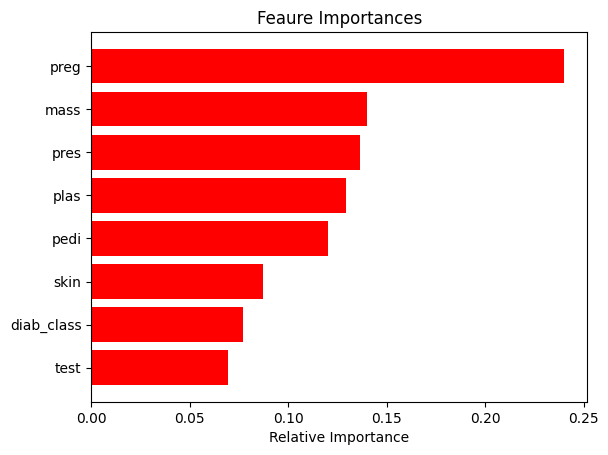

In [14]:
import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt

#load the data into a dataframe
header_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = pd.read_csv(r'pima_indians_diabetes_2 (1).csv', names=header_names)

#get the dimension of the shape
print(my_data.shape)

#get the row with empty values
empty_values = my_data[my_data.isna().any(axis=1)]
print(empty_values)
print(len(empty_values))

#use the simple imputer function to replace the empty values in the dataframe
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)

#convert the data back to a dataframe and bind the headers
my_data = pd.DataFrame(new_data, columns= header_names)
#dropping the diab class as it is just unique numbers and hold no importance
#X_data = my_data.drop(['diab_class'], axis=1)

#extract the x data - independent variables
X_data = my_data.drop(['age'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the model
#rf_model.fit(X_data,my_data.diab_class)
rf_model.fit(X_data, my_data.age)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-9:] #top 10 features
plt.title('Feaure Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Backward Feature Elimination #recursive feature elimination

In [16]:
import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE

#load the data into a dataframe
header_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = pd.read_csv(r'pima_indians_diabetes_2 (1).csv', names=header_names)

#get the dimension of the shape
print(my_data.shape)

#get the row with empty values
empty_values = my_data[my_data.isna().any(axis=1)]
print(empty_values)
print(len(empty_values))

#use the simple imputer function to replace the empty values in the dataframe
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)

#convert the data back to datframe and bind the headers as required
my_data = pd.DataFrame(new_data, columns=header_names)

#extract the x data - independent variables
X_data = my_data.drop(['diab_class'], axis=1)
print(X_data.head(3), '\n checking the new X data \n ')

#declare a linear model
lr = LinearRegression()

#recursive feature elimination
rfe = RFE(lr, n_features_to_select=3, step=1)
rfe = rfe.fit(X_data, my_data.diab_class)

print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Features Ranking: ", rfe.ranking_)

(771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3
   preg   plas  pres  skin  test  mass   pedi   age
0   6.0  148.0  72.0  35.0   0.0  33.6  0.627  50.0
1   1.0   85.0  66.0  29.0   0.0  26.6  0.351  31.0
2   8.0  183.0  64.0   0.0   0.0  23.3  0.672  32.0 
 checking the new X data 
 
Number of Features:  3
Selected Features:  [ True False False False False  True  True False]
Features Ranking:  [1 2 4 6 5 1 1 3]
